**Project Title:** Amazon Product Revenue Prediction & Key Driver Analysis

**Problem Statement**

Amazon hosts millions of product listings across multiple categories, where revenue performance varies significantly due to differences in pricing, customer trust, demand, and product positioning. However, it is not always clear which factors most strongly influence revenue or how accurately future revenue can be estimated for individual products.

The objective of this project is to build a machine learning–based regression model to predict product-level revenue on Amazon using historical pricing, demand, customer ratings, reviews, and category information. In addition, the project aims to identify and quantify the key drivers of revenue to support data-driven decisions related to pricing strategy, product promotion, and category optimization.

In [73]:
#importing libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#warnings
import warnings
warnings.filterwarnings("ignore")


In [74]:
#load data
df=pd.read_csv('/content/amazon_products_sales_data_cleaned.csv')

Understanding Data

In [75]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


In [76]:
df.shape


(42675, 17)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

In [78]:
df.describe()

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage
count,41651.000000,41651.000000,32164.000000,40613.000000,40613.000000,40613.000000
mean,4.399431,3087.106000,1293.665278,243.227289,257.611107,6.547151
std,0.386997,13030.460133,6318.323574,473.351545,496.633495,12.744715
min,1.000000,1.000000,50.000000,2.160000,2.160000,0.000000
25%,4.200000,82.000000,100.000000,29.690000,32.990000,0.000000
50%,4.500000,343.000000,200.000000,84.990000,89.000000,0.000000
75%,4.700000,1886.000000,400.000000,224.000000,229.990000,8.490000
max,5.000000,865598.000000,100000.000000,5449.000000,5449.000000,85.420000


In [79]:
df.isnull().sum()


,0
product_title,0
product_rating,1024
total_reviews,1024
purchased_last_month,10511
discounted_price,2062
original_price,2062
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,14653


In [133]:
#Feature Engineering

In [81]:
#Removing Unnecessary Columns not required for model training

In [82]:
df.drop(columns=[
    "product_title",
    "product_image_url",
    "product_page_url",
    "data_collected_at",
    "buy_box_availability",
    "delivery_date",
    "sustainability_tags"
], inplace=True)


In [134]:
#Handle Missing Numerical Values

In [83]:
df["product_rating"].fillna(0, inplace=True)
df["total_reviews"].fillna(0, inplace=True)
df["purchased_last_month"].fillna(0, inplace=True)


In [135]:
#Drop Rows with Missing Price Information

In [84]:
df.dropna(subset=[
    "discounted_price",
    "original_price",
    "discount_percentage"
], inplace=True)


In [136]:
#Convert Boolean Columns to Binary

In [85]:
bool_cols = ["is_best_seller", "is_sponsored", "has_coupon"]

for col in bool_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


**Feature Engineering**

In [137]:
#Create Target Variable (Revenue)

In [86]:
df["price_difference"] = df["original_price"] - df["discounted_price"]
df["rating_strength"] = df["product_rating"] * df["total_reviews"]
df["revenue"] = df["discounted_price"] * df["purchased_last_month"]



In [138]:
df.isnull().sum()

,0
product_rating,0
total_reviews,0
purchased_last_month,0
discounted_price,0
original_price,0
product_category,0
discount_percentage,0
price_difference,0
rating_strength,0
revenue,0


In [87]:
df

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,product_category,discount_percentage,price_difference,rating_strength,revenue
0,4.6,375.0,300.0,89.68,159.00,NaN,NaN,NaN,Phones,43.60,69.32,1725.0,26904.0
1,4.3,2457.0,6000.0,9.99,15.99,NaN,NaN,NaN,Laptops,37.52,6.00,10565.1,59940.0
2,4.6,3044.0,2000.0,314.00,349.00,NaN,NaN,NaN,Laptops,10.03,35.00,14002.4,628000.0
3,4.6,35882.0,10000.0,162.24,162.24,NaN,NaN,NaN,Phones,0.00,0.00,165057.2,1622400.0
4,4.8,28988.0,10000.0,72.74,72.74,NaN,NaN,NaN,Phones,0.00,0.00,139142.4,727400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,5.0,1.0,100.0,195.99,195.99,NaN,NaN,NaN,TV & Display,0.00,0.00,5.0,19599.0
42671,4.2,20.0,200.0,89.99,89.99,NaN,NaN,NaN,Cameras,0.00,0.00,84.0,17998.0
42672,4.3,57.0,50.0,899.99,1099.99,NaN,NaN,NaN,Chargers & Cables,18.18,200.00,245.1,44999.5
42673,4.7,7102.0,500.0,10.39,15.98,NaN,NaN,NaN,Chargers & Cables,34.98,5.59,33379.4,5195.0


In [88]:
df["is_best_seller"].value_counts(dropna=False)
df["is_sponsored"].value_counts(dropna=False)
df["has_coupon"].value_counts(dropna=False)


,count
has_coupon,
NaN,40613


In [89]:
df.drop(columns=[
    "is_best_seller",
    "is_sponsored",
    "has_coupon"
], inplace=True)


In [90]:
df.isnull().sum()

,0
product_rating,0
total_reviews,0
purchased_last_month,0
discounted_price,0
original_price,0
product_category,0
discount_percentage,0
price_difference,0
rating_strength,0
revenue,0


In [139]:
#Final Feature Set

In [91]:
features = [
    "discount_percentage",
    "discounted_price",
    "original_price",
    "price_difference",
    "product_rating",
    "total_reviews",
    "rating_strength",
    "product_category"
]

target = "revenue"

X = df[features]
y = df[target]


I carefully analyzed missing values column-wise. Ratings and reviews were filled with zero because missing implies no engagement. Purchase count was filled with zero to represent no sales. Pricing-related missing values were not imputed and those rows were dropped to avoid distorting revenue. High-missing and weak-signal columns were removed. This ensured data integrity before modeling.

In [92]:
df.columns


Index(['product_rating', 'total_reviews', 'purchased_last_month',
       'discounted_price', 'original_price', 'product_category',
       'discount_percentage', 'price_difference', 'rating_strength',
       'revenue'],
      dtype='object')

EDA

Revenue Distribution

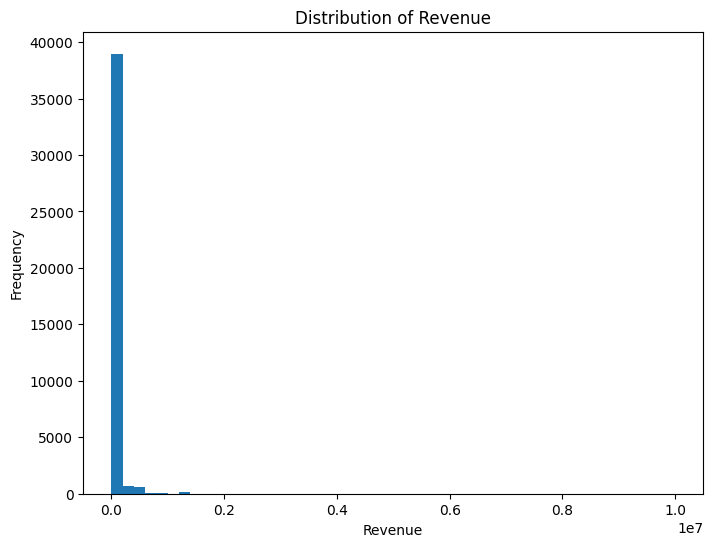

In [93]:
plt.figure(figsize=(8,6))
plt.hist(df["revenue"], bins=50)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue")
plt.show()


By seeing Graph we observe

Revenue is right-skewed

Many low-revenue products

Few very high-revenue products (outliers)

In [94]:
#plot for Revenue outliers boxplot

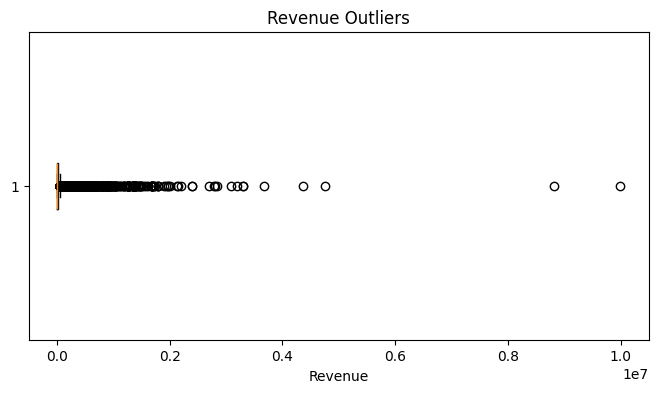

In [95]:
plt.figure(figsize=(8,4))
plt.boxplot(df["revenue"], vert=False)
plt.xlabel("Revenue")
plt.title("Revenue Outliers")
plt.show()


In [96]:
#As we can see E-commerce data naturally contains extreme high-revenue outliers.

In [97]:
#Discount vs Revenue

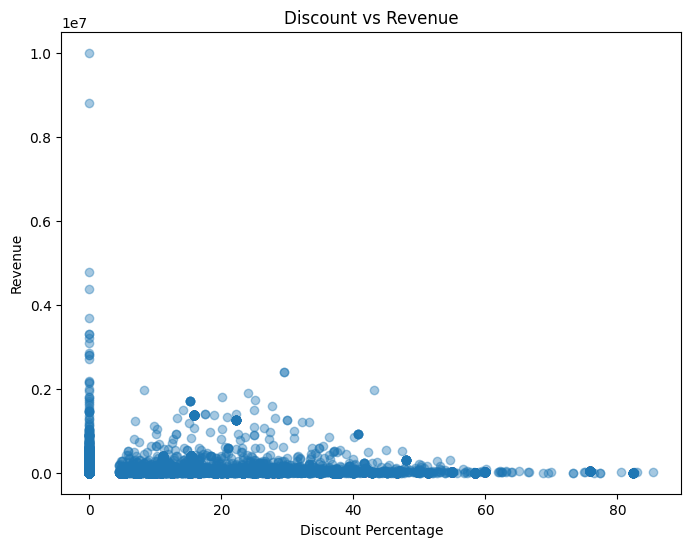

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(df["discount_percentage"], df["revenue"], alpha=0.4)
plt.xlabel("Discount Percentage")
plt.ylabel("Revenue")
plt.title("Discount vs Revenue")
plt.show()


Insight

High discount ≠ high revenue

Weak linear relationship

In [99]:
#Rating Strength vs Revenue

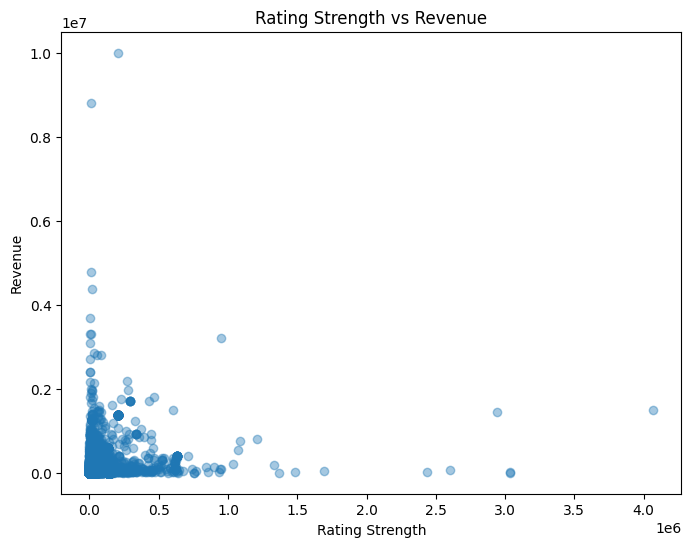

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(df["rating_strength"], df["revenue"], alpha=0.4)
plt.xlabel("Rating Strength")
plt.ylabel("Revenue")
plt.title("Rating Strength vs Revenue")
plt.show()


“Products with strong customer trust tend to generate higher revenue.”

In [101]:
#Category-wise Average Revenue

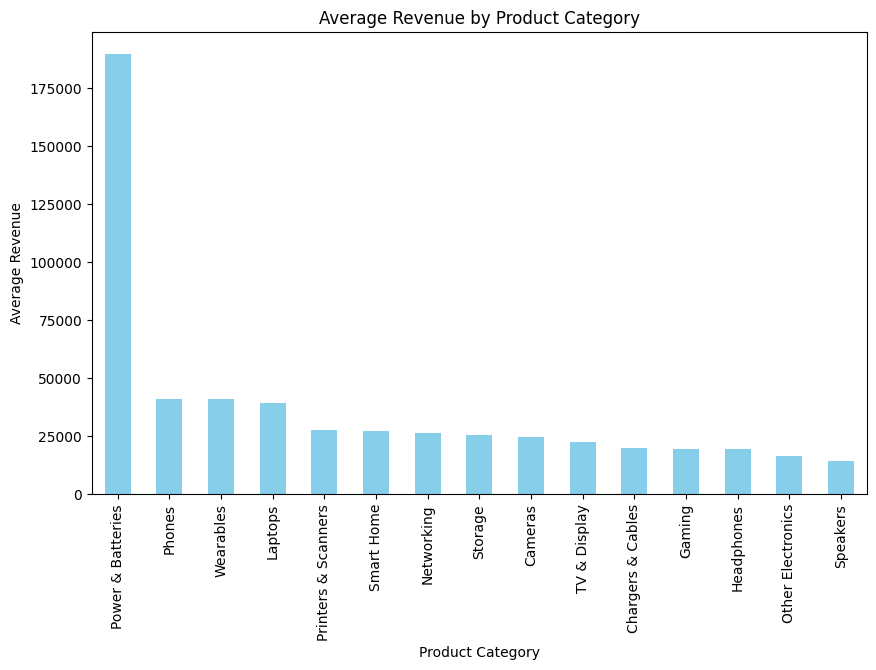

In [102]:
category_revenue = df.groupby("product_category")["revenue"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
category_revenue.plot(kind="bar", color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Product Category")
plt.show()


“Revenue contribution varies significantly across categories, supporting category-specific pricing strategies.”

In [103]:
#splitting data for testing , training our models

In [104]:
from sklearn.model_selection import train_test_split

features = [
    "discount_percentage",
    "discounted_price",
    "original_price",
    "price_difference",
    "product_rating",
    "total_reviews",
    "rating_strength",
    "product_category"
]

X = df[features]
y = df["revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [105]:
# Preprocessing Pipeline

In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = [
    "discount_percentage",
    "discounted_price",
    "original_price",
    "price_difference",
    "product_rating",
    "total_reviews",
    "rating_strength"
]

categorical_features = ["product_category"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [107]:
#model fitting, linear regression

In [108]:
from sklearn.linear_model import LinearRegression

linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

linear_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['discount_percentage',
                                                   'discounted_price',
                                                   'original_price',
                                                   'price_difference',
                                                   'product_rating',
                                                   'total_reviews',
                                                   'rating_strength']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_category'])])),
                ('model', LinearRegression())])

In [109]:
#Evaluate Linear Regression

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lr = linear_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)


Linear Regression
MAE : 46250.25557148332
RMSE: 119227.26307987809
R2  : 0.15407681854941735


In [111]:
# now fiting our next model which is Random Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['discount_percentage',
                                                   'discounted_price',
                                                   'original_price',
                                                   'price_difference',
                                                   'product_rating',
                                                   'total_reviews',
                                                   'rating_strength']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_category'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [113]:
#evaluating our Random Forest Model

In [114]:
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R2  :", r2_rf)


Random Forest
MAE : 14537.79768021569
RMSE: 75335.64618908006
R2  : 0.6622613114276202


In [115]:
#comparing two models

In [116]:

comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison


,Model,MAE,RMSE,R2 Score
0,Linear Regression,46250.255571,119227.263080,0.154077
1,Random Forest,14537.797680,75335.646189,0.662261


Random Forest usually → lower MAE/RMSE (captures non-linear effects)

Linear Regression → interpretability (baseline sanity check)

In [117]:
encoded_cat_features = (
    rf_model.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
)

all_features = numerical_features + list(encoded_cat_features)

importances = rf_model.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
6,rating_strength,0.367281
5,total_reviews,0.191424
1,discounted_price,0.099753
2,original_price,0.071963
4,product_rating,0.067472
15,product_category_Power & Batteries,0.062469
3,price_difference,0.035306
11,product_category_Laptops,0.034941
0,discount_percentage,0.027317
16,product_category_Printers & Scanners,0.012788


Products with strong customer trust generate significantly higher revenue.

In [132]:
#Visualize Top Features

<Figure size 1000x600 with 0 Axes>

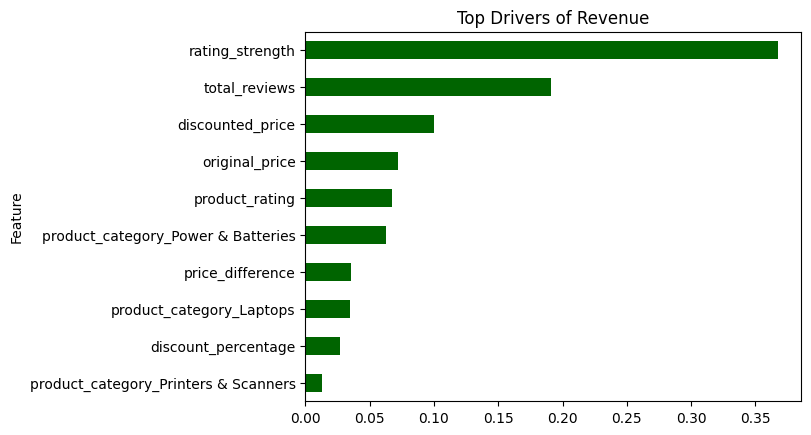

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importance_df.head(10).plot(
    kind="barh", x="Feature", y="Importance", legend=False, color="Darkgreen"
)
plt.gca().invert_yaxis()
plt.title("Top Drivers of Revenue")
plt.show()


Model’s Testing Output (Regression)

In [119]:
y_pred = rf_model.predict(X_test)


In [120]:
y_pred[:5]


array([26995.,     0.,     0., 16800.,  3820.])

In [121]:
#Compare actual vs predicted

In [122]:
comparison_df = pd.DataFrame({
    "Actual_Revenue": y_test.values[:10],
    "Predicted_Revenue": y_pred[:10]
})

comparison_df


,Actual_Revenue,Predicted_Revenue
0,26995.0,26995.0
1,0.0,0.0
2,0.0,0.0
3,16800.0,16800.0
4,3820.0,3820.0
5,0.0,0.0
6,1363500.0,1363500.0
7,23750.0,23750.0
8,0.0,0.0
9,393800.0,393800.0


In [123]:
#Actual vs Predicted Revenue

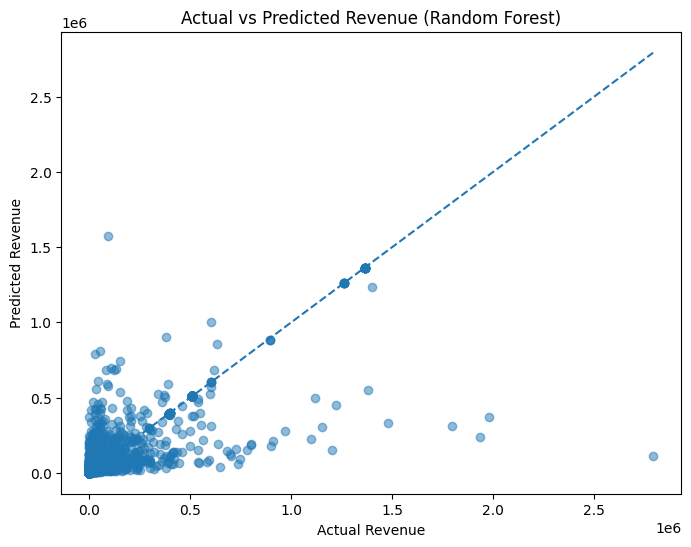

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Random Forest)")
plt.show()


In [125]:
#Residual Plot

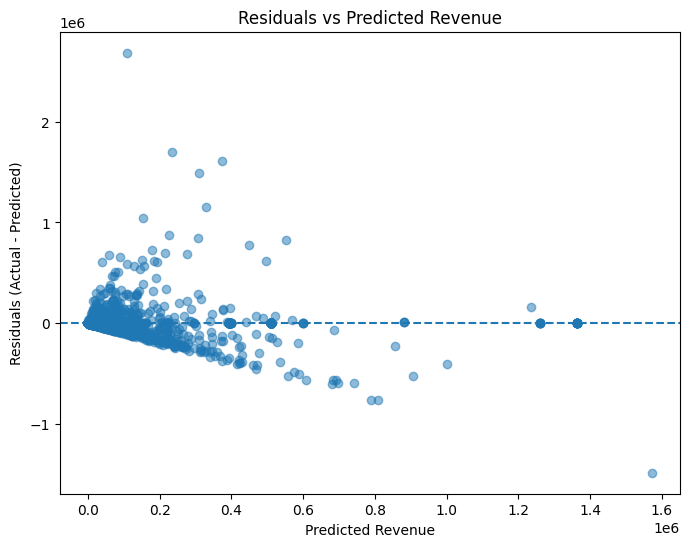

In [126]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')

plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Revenue")
plt.show()


In [127]:
#Residuals randomly scattered around zero

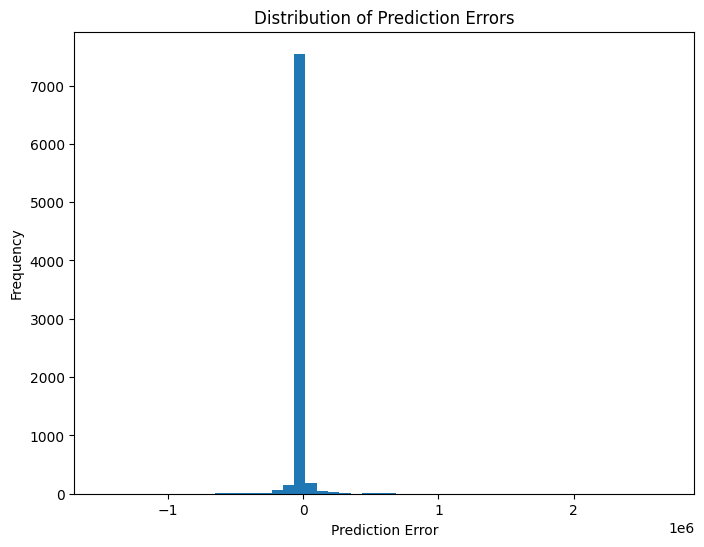

In [128]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


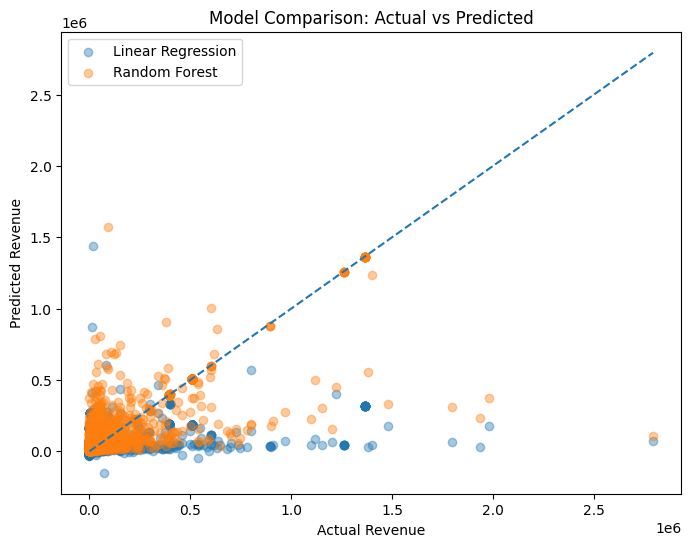

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.4, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.4, label="Random Forest")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Model Comparison: Actual vs Predicted")
plt.legend()
plt.show()


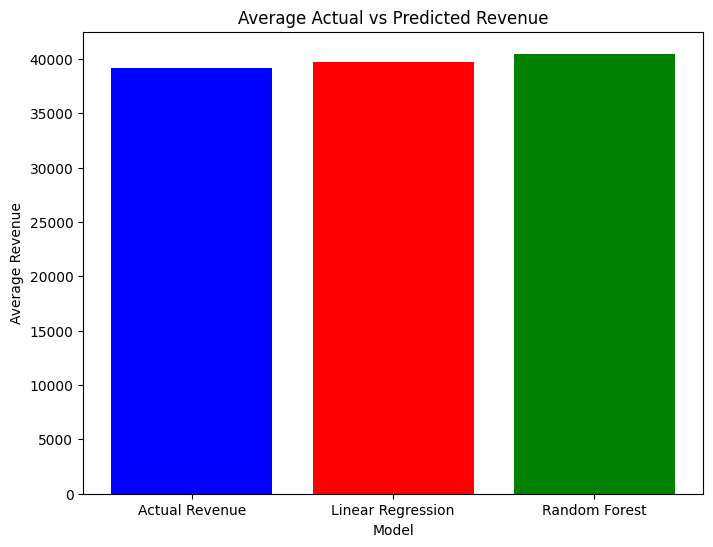

In [130]:
import numpy as np
import matplotlib.pyplot as plt

avg_actual = np.mean(y_test)
avg_pred_lr = np.mean(y_pred_lr)
avg_pred_rf = np.mean(y_pred_rf)

labels = ["Actual Revenue", "Linear Regression", "Random Forest"]
values = [avg_actual, avg_pred_lr, avg_pred_rf]

plt.figure(figsize=(8,6))
plt.bar(labels, values, color=["blue", "red", "green"])
plt.xlabel("Model")
plt.ylabel("Average Revenue")
plt.title("Average Actual vs Predicted Revenue")
plt.show()


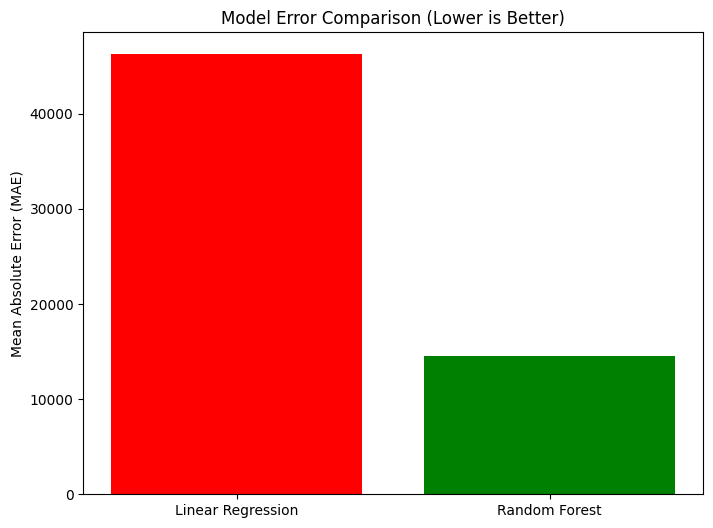

In [131]:
models = ["Linear Regression", "Random Forest"]
mae_values = [mae_lr, mae_rf]

plt.figure(figsize=(8,6))
plt.bar(models, mae_values, color=["red", "green"])
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Error Comparison (Lower is Better)")
plt.show()


**Conclusion**:
This is a complete end-to-end regression pipeline including data cleaning, feature engineering, EDA, modeling, and evaluation.

Established a Linear Regression baseline and improved performance using a Random Forest Regressor, increasing R² from 0.15 to 0.66.

Reduced Mean Absolute Error by ~70%, demonstrating strong model generalization on unseen data.

Engineered high-signal features such as rating strength (rating × reviews), which emerged as the most influential predictor of revenue.

Used feature importance analysis to interpret model decisions and validate non-linear relationships in pricing and demand data.

Evaluated model performance using MAE, RMSE, R², and visual diagnostics (actual vs predicted, residuals).

-By **Mohd Irfan**